In [1]:
import pandas as pd
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
file_path = 'eng_pp_9523_eda_pivoted.csv'
df = pd.read_csv(file_path)

In [3]:
df

,Unnamed: 0,Year,Month,price,Old/New,Detached,Semi-detached,Terraced,Flat,Others,Street,Locality,Town/City,District,County
0,0,1995,February,44500,N,0,0,1,0,0,HOWICK PARK,SUNDERLAND,SUNDERLAND,SUNDERLAND,TYNE AND WEAR
1,1,1995,January,56500,N,0,0,1,0,0,BRICK KILN CLOSE,COGGESHALL,COLCHESTER,BRAINTREE,ESSEX
2,2,1995,July,58000,N,0,0,1,0,0,RAINSBROOK DRIVE,SHIRLEY,SOLIHULL,SOLIHULL,WEST MIDLANDS
3,3,1995,June,51000,N,0,1,0,0,0,MERRY HILL,BRIERLEY HILL,BRIERLEY HILL,DUDLEY,WEST MIDLANDS
4,4,1995,March,17000,N,0,0,1,0,0,DENMAN STREET,ROTHERHAM,ROTHERHAM,ROTHERHAM,SOUTH YORKSHIRE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22653981,22653981,2023,January,158000,N,0,1,0,0,0,LONGFELLOW DRIVE,NaN,WORKSOP,BASSETLAW,NOTTINGHAMSHIRE
22653982,22653982,2023,May,172000,N,0,1,0,0,0,EARLSWOOD DRIVE,NaN,MANSFIELD,MANSFIELD,NOTTINGHAMSHIRE
22653983,22653983,2023,April,272000,N,1,0,0,0,0,CASTLETON AVENUE,ARNOLD,NOTTINGHAM,GEDLING,NOTTINGHAMSHIRE
22653984,22653984,2023,June,260000,N,1,0,0,0,0,COOPER CLOSE,CROPWELL BISHOP,NOTTINGHAM,RUSHCLIFFE,NOTTINGHAMSHIRE


In [4]:
filtered_data = df[df["Year"] == 1995]

In [5]:
# Step 3: Data Preprocessing
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str))
df.set_index('Date', inplace=True)
df.drop(['Year', 'Month'], axis=1, inplace=True)

In [6]:
# Resample your data to have evenly spaced intervals
df_resampled = df.resample('M').mean()  # Assuming monthly data

C:\Users\David\AppData\Local\Temp\ipykernel_4000\3043855750.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample('M').mean()  # Assuming monthly data


In [7]:
df

,Unnamed: 0,price,Old/New,Detached,Semi-detached,Terraced,Flat,Others,Street,Locality,Town/City,District,County
Date,,,,,,,,,,,,,
1995-02-01,0,44500,N,0,0,1,0,0,HOWICK PARK,SUNDERLAND,SUNDERLAND,SUNDERLAND,TYNE AND WEAR
1995-01-01,1,56500,N,0,0,1,0,0,BRICK KILN CLOSE,COGGESHALL,COLCHESTER,BRAINTREE,ESSEX
1995-07-01,2,58000,N,0,0,1,0,0,RAINSBROOK DRIVE,SHIRLEY,SOLIHULL,SOLIHULL,WEST MIDLANDS
1995-06-01,3,51000,N,0,1,0,0,0,MERRY HILL,BRIERLEY HILL,BRIERLEY HILL,DUDLEY,WEST MIDLANDS
1995-03-01,4,17000,N,0,0,1,0,0,DENMAN STREET,ROTHERHAM,ROTHERHAM,ROTHERHAM,SOUTH YORKSHIRE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-01,22653981,158000,N,0,1,0,0,0,LONGFELLOW DRIVE,NaN,WORKSOP,BASSETLAW,NOTTINGHAMSHIRE
2023-05-01,22653982,172000,N,0,1,0,0,0,EARLSWOOD DRIVE,NaN,MANSFIELD,MANSFIELD,NOTTINGHAMSHIRE
2023-04-01,22653983,272000,N,1,0,0,0,0,CASTLETON AVENUE,ARNOLD,NOTTINGHAM,GEDLING,NOTTINGHAMSHIRE


In [8]:
data_type = df['Terraced'].dtype
print(data_type)

int64


In [9]:
# Extract relevant property types columns
property_types = ['Terraced', 'Semi-detached', 'Detached', 'Flat', 'Others']

In [10]:
# Perform STL decomposition for each property type
for prop_type in property_types:
    # Fit the STL model
    stl_model = STL(df[prop_type], seasonal=13, period=12)  # Assuming monthly data with a yearly seasonality
    result = stl_model.fit()

<Figure size 1200x800 with 0 Axes>

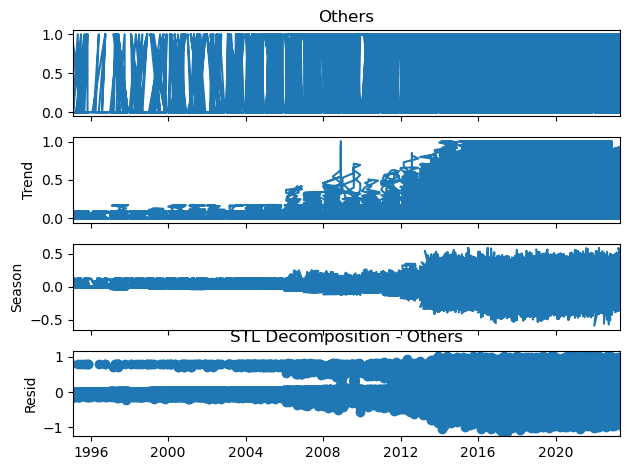

In [11]:
# Plot the decomposition
plt.figure(figsize=(12, 8))
result.plot()
plt.title(f'STL Decomposition - {prop_type}')
plt.show()

In [12]:
# Access the decomposed components
trend = result.trend
seasonal = result.seasonal
residual = result.resid

    # You can use trend, seasonal, and residual as needed for further analysis or forecasting
    # For example, to access the trend component for 'Terraced':
    # trend_terraced = trend['Terraced']

# Save the decomposed components if needed
result_df = pd.DataFrame({'Trend': trend, 'Seasonal': seasonal, 'Residual': residual})
result_df.to_csv(f'{prop_type}_stl_decomposition.csv')